# Import Libraries here

In [1]:
library ("osmar")
library("igraph")

Loading required package: XML
Loading required package: RCurl
Loading required package: bitops
Loading required package: geosphere
Warning message:
“package ‘geosphere’ was built under R version 3.4.2”
Attaching package: ‘osmar’

The following object is masked from ‘package:utils’:

    find


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



# User Input Area

In [2]:
# what is your area name?
area <- "london"
#specify (minimum longitude, minimum latitude, maximum longitude, maximum latitude).
london <- corner_bbox(-0.1049, 51.5113, -0.0815, 51.5207)
#How many dataset you want
number <- 400

# Download street network from OSM

In [3]:
src <- osmsource_api ()
data <- get_osm(london, source = src)
dim(data)

Warning message in strptime(ret$timestamp, format = "%Y-%m-%dT%H:%M:%S"):
“unknown timezone 'default/Europe/London'”

nodes      ways relations 
    27552      5085       475

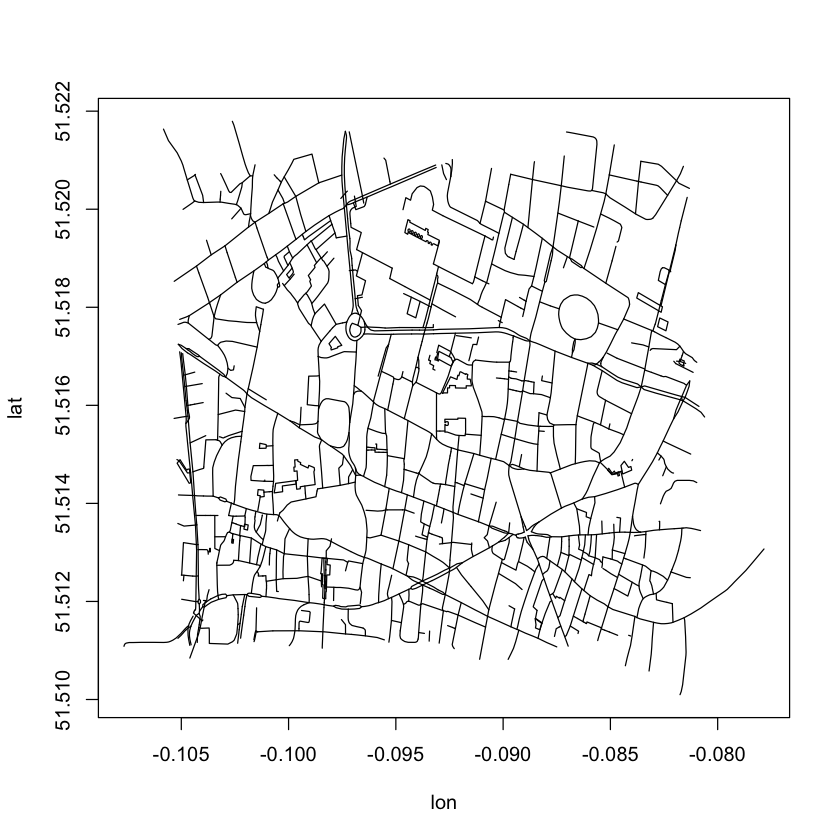

In [13]:
#Subset the data to get the road network
hways_data <- subset(data, way_ids = find(data, way(tags(k == "highway"))))
hways <- find(hways_data, way(tags(k == "name")))
hways <- find_down(data, way(hways))
hways_data <- subset(data, ids = hways)
par(bg = "white")
plot_ways(hways_data, col="black", bg ='white')
# plot_nodes(hways_data, pch=19, cex=0.3, add=T, col="white")

In [14]:
dim(hways_data)

nodes      ways relations 
     4970      1031         0

# Convert to Igraph

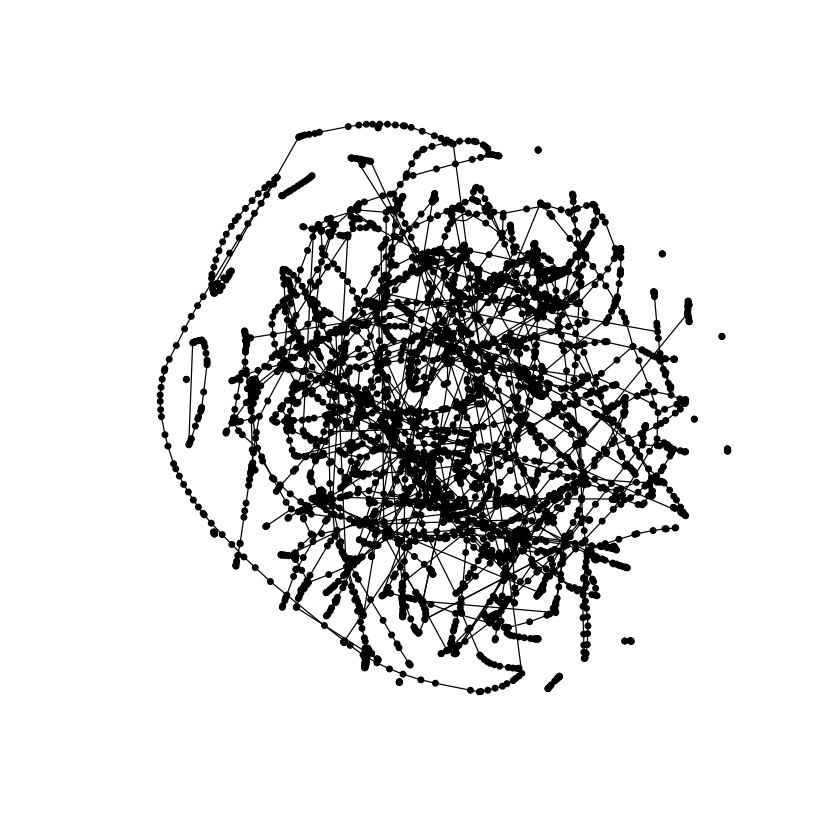

In [15]:
hways_graph = as_igraph(hways_data)
hways_graph = as.undirected(hways_graph)
# V(hways_graph)$name <- 1:length(V(hways_graph))
par(bg = "white")
plot(hways_graph, vertex.size=2, edge.color="black", vertex.color="black", vertex.label=NA, vertex.label.cex=0.5)
# vertex.label=NA

# Run Dijkstra to get training dataset

In [16]:
dir.create("data")
directory <- file.path("data", area)
dir.create(directory)

Warning message in shortest_paths(hways_graph, from = V(hways_graph)[j], to = V(hways_graph)[k]):
“At structural_properties.c:4589 :Couldn't reach some vertices”Warning message in shortest_paths(hways_graph, from = V(hways_graph)[j], to = V(hways_graph)[k]):
“At structural_properties.c:4589 :Couldn't reach some vertices”Warning message in shortest_paths(hways_graph, from = V(hways_graph)[j], to = V(hways_graph)[k]):
“At structural_properties.c:4589 :Couldn't reach some vertices”Warning message in shortest_paths(hways_graph, from = V(hways_graph)[j], to = V(hways_graph)[k]):
“At structural_properties.c:4589 :Couldn't reach some vertices”Warning message in shortest_paths(hways_graph, from = V(hways_graph)[j], to = V(hways_graph)[k]):
“At structural_properties.c:4589 :Couldn't reach some vertices”Warning message in shortest_paths(hways_graph, from = V(hways_graph)[j], to = V(hways_graph)[k]):
“At structural_properties.c:4589 :Couldn't reach some vertices”Warning message in shortest_paths(

“At structural_properties.c:4589 :Couldn't reach some vertices”Warning message in shortest_paths(hways_graph, from = V(hways_graph)[j], to = V(hways_graph)[k]):
“At structural_properties.c:4589 :Couldn't reach some vertices”Warning message in shortest_paths(hways_graph, from = V(hways_graph)[j], to = V(hways_graph)[k]):
“At structural_properties.c:4589 :Couldn't reach some vertices”Warning message in shortest_paths(hways_graph, from = V(hways_graph)[j], to = V(hways_graph)[k]):
“At structural_properties.c:4589 :Couldn't reach some vertices”Warning message in shortest_paths(hways_graph, from = V(hways_graph)[j], to = V(hways_graph)[k]):
“At structural_properties.c:4589 :Couldn't reach some vertices”Warning message in shortest_paths(hways_graph, from = V(hways_graph)[j], to = V(hways_graph)[k]):
“At structural_properties.c:4589 :Couldn't reach some vertices”Warning message in shortest_paths(hways_graph, from = V(hways_graph)[j], to = V(hways_graph)[k]):
“At structural_properties.c:4589 :

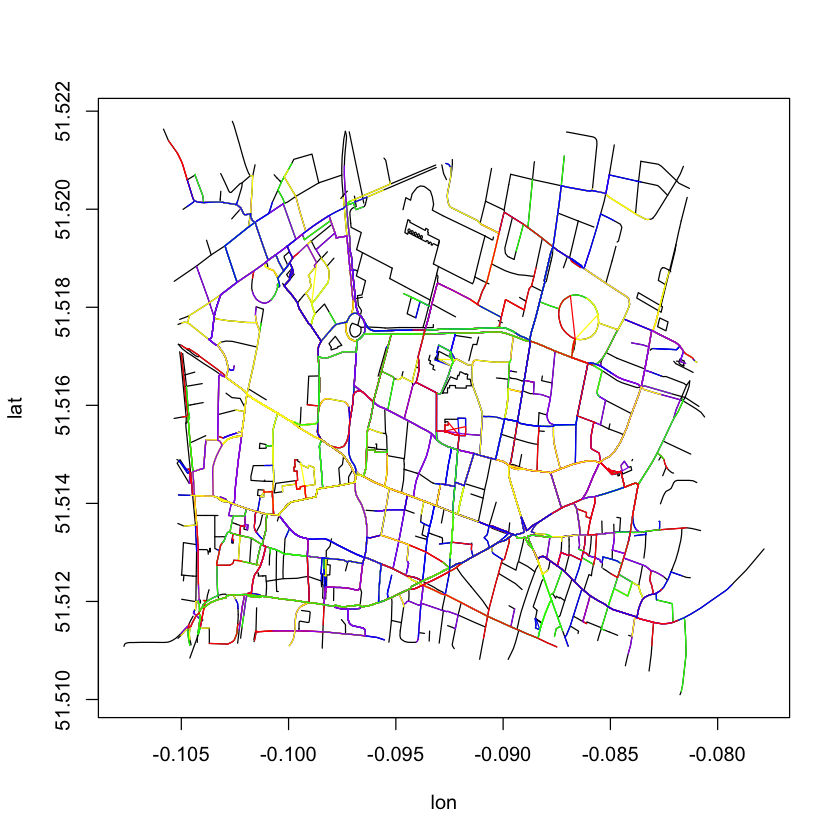

In [17]:
par(bg = "white")
plot_ways(hways_data, col="black", bg ='white')
# plot_nodes(hways_data, pch=19, cex=0.3, add=T, col="white")
for (i in 1:number) {
    num <- floor(runif(2, min=0, max=length(V(hways_graph))))
    j <- num[1]
    k <- num[2]
    
    route <- shortest_paths(hways_graph, from = V(hways_graph)[j], to = V(hways_graph)[k])
    route_nodes <- as.list(route$vpath[[1]]$name)
   
    filename = file.path(directory, i)
    cat(paste(route_nodes, collapse=", "), file=filename)
    
    route_ids <- find_up(hways_data, node(route_nodes))
    shortest_route <- subset(hways_data, ids = route_ids)
    
    color_list <- c("green", "yellow", "purple", "red", "blue")
    color <- sample(color_list, 1)
    
#     plot_nodes(shortest_route, add = T, col = color)
    plot_ways(shortest_route, add = T, col = color)
}

# Generate adjacency matrix

In [18]:
adjacency_matrix <- as_adj(hways_graph)
adjacency_matrix <- as.matrix(adjacency_matrix)
filename <- file.path("data", area, "adjacency_matrix.csv")
write.csv(adjacency_matrix, filename)

In [19]:
# closeness_centrality <- (1 / closeness(hways_graph))
# closeness_centrality <- as.data.frame(closeness_centrality)
# filename <- file.path("../../data", area, "closeness_centrality.csv")
# write.csv(closeness_centrality, file = filename)